
- 데이터를 가져오는 방법
    - 데이터 다운로드 ex) 공공데이터 포탈
        - excel, csv, txt, tsv, json 파일을 주로 씀
    - API
        - 플로그램과 프로그램이 주고받는 방식
        - 인증키와 정의된 문서 필수
        - 태그방식
    - 웹 크롤링
        - 페이지 소스를 열어서 찾아서 긁어내야 함
        - HTML 태그규칙, CSS규칙


## 데이터수집 : 웹 크롤링

In [1]:
from bs4 import BeautifulSoup as bs

In [2]:
# 웹 드라이버 라이브러리
from selenium import webdriver

In [34]:
driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver.exe")

C:\Users\admin\AppData\Local\Temp\ipykernel_8180\2815863721.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver.exe")


In [4]:
driver.get('https://www.naver.com')

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:u
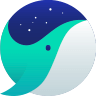
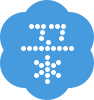

In [5]:
driver.page_source

In [6]:
html = '''
<html>
<head>
</head>
<body>
    <h1> 우리동네시장</h1>
    <div class = 'sale'>
        <p id='fruits1' class='fruits'>
            <span class = 'name'> 바나나 </span>
            <span class = 'price'> 3000원 </span>
            <span class = 'inventory'> 500개 </span>
            <span class = 'store'> 가나다상회 </span>
            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
        </p>
    </div>
    <div class = 'prepare'>
        <p id='fruits2' class='fruits'>
            <span class ='name'> 파인애플 </span>
        </p>
    </div>
</body>
</html>
'''

In [7]:
soup = bs(html, "html.parser")
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

### HTML 정보 찾기 -> 태그 이름 활용

In [10]:
# 태그 중에 span 이라는 이름을 가지는 모든 것 조회
soup.select("span")

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [9]:
soup.find_all("p")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [13]:
# class는 . id는 #
soup.select("#fruits1")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [15]:
soup.select(".price")

[<span class="price"> 3000원 </span>]

In [16]:
soup.select("span.name")

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [18]:
soup.select("#fruits1>span.name")

[<span class="name"> 바나나 </span>]

In [23]:
# 태그명이 div 이면서 class 이름이 sale인 태그의 자식 중에 아이디 이름이 fruits1인 태그
soup.select("div.sale > #fruits1 > span.name")

[<span class="name"> 바나나 </span>]

In [25]:
# 자손은 띄어쓰기
soup.select("div.sale span.name")

[<span class="name"> 바나나 </span>]

In [28]:
soup.select("div.sale span.name")[0].text

' 바나나 '

In [29]:
soup.select("div.sale span.name")[0]['class']

['name']

In [33]:
soup.select("a")[0]["href"]

'http://bit.ly/forPlaywithData'

## 멜론 노래 순위 정보 크롤링

In [35]:
url = "https://www.melon.com/chart/index.htm"

In [36]:
driver.get(url)
html = driver.page_source
html

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;TOP100&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b">\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/

In [122]:
singer = soup.select("#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank02 > span > a")
singer[0].text

'IVE (아이브)'

In [111]:
title = soup.select("#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank01 > span > a")
title[0].text

'LOVE DIVE'

In [138]:
like = soup.select("#lst50 > td:nth-child(8) > div > button > span.cnt")
like[0].text.split(('\n'))[2]

'143,914'

In [123]:
for i in range(0,50,1):
    print(singer[i].text)

IVE (아이브)
(여자)아이들
싸이 (PSY)
멜로망스
방탄소년단
임영웅
임영웅
BIG Naughty (서동현)
임영웅
BIGBANG (빅뱅)
경서
LE SSERAFIM (르세라핌)
BE'O (비오)
임영웅
임영웅
임영웅
김민석 (멜로망스)
Red Velvet (레드벨벳)
방탄소년단
임영웅
임영웅
임영웅
임영웅
임영웅
방탄소년단
임영웅
임영웅
임영웅
방탄소년단
주호
이무진
박재범
IVE (아이브)
케이시 (Kassy)
경서예지
전건호
세븐틴
태연 (TAEYEON)
(여자)아이들
Charlie Puth
MSG워너비(M.O.M)
제시 (Jessi)
주시크 (Joosiq)
The Kid LAROI
Justin Bieber
다비치
방탄소년단
방탄소년단
태연 (TAEYEON)
방탄소년단


In [124]:
import pandas as pd

In [142]:
rank = []
title_list = []
singer_list = []
like_list = []

for i in range(0,50,1):
    title_list.append(title[i].text.strip())
    singer_list.append(singer[i].text.strip())
    like_list.append(like[i].text.split(('\n'))[2])
    rank.append(i+1)

In [143]:
info = { '순위' : rank, "가수" : singer_list, "제목" : title_list, "좋아요" : like_list}
melon = pd.DataFrame(info)
melon.set_index("순위",inplace=True)
melon

,가수,제목,좋아요
순위,,,
1,IVE (아이브),LOVE DIVE,"143,914"
2,(여자)아이들,TOMBOY,"187,946"
3,싸이 (PSY),That That (prod. & feat. SUGA of BTS),"97,369"
4,멜로망스,사랑인가 봐,"132,345"
5,방탄소년단,Yet To Come,"98,064"
6,임영웅,우리들의 블루스,"64,805"
7,임영웅,사랑은 늘 도망가,"164,694"
8,BIG Naughty (서동현),정이라고 하자 (Feat. 10CM),"126,441"
9,임영웅,다시 만날 수 있을까,"52,376"


In [ ]:
# selenium 방식..
from selenium import webdriver

url = "http://www.melon.com/chart/index.htm"
driver.get(url)

# html = driver.page_source
# soup = BeautifulSoup(html, "html.parser")

songs = driver.find_elements_by_css_selector("tr")[1 : 11]

list_df = []

for song in songs:
    rank = song.find_elements_by_css_selector("div.t_center > span.rank")[0].text
    title = song.find_elements_by_css_selector("div.ellipsis.rank01 > span > a")[0].text
    singer = song.find_elements_by_css_selector("div.ellipsis.rank02 > a")[0].text
    like = song.find_elements_by_css_selector("button.button_etc > span.cnt")[0].text.split("\n")[-1]
    
    list_df.append([rank, title, singer, like])
    
list_df    
df = pd.DataFrame(list_df, 
                  columns=["순위", "제목", "가수", "좋아요!"])
df